In [1]:
from sklearn.datasets import make_classification
import numpy as np


In [6]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [7]:
import matplotlib.pyplot as plt

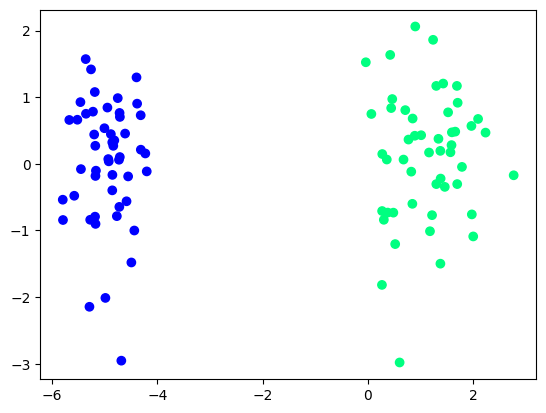

In [8]:
plt.scatter(X[:,0],X[:,1],c=y, cmap="winter")

In [41]:
def step(val):
    return 1 if val > 0 else 0

def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [42]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    # print(X)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 1000

    for i in range(epochs):
        j = np.random.randint(0, X.shape[0])
        y_hat = step(np.dot(weights, X[j]))
        weights = weights + (y[j] - y_hat) * (lr * X[j])

    return weights[0], weights[1:]

In [43]:
def fit_sigmoid(X,y):
    X = np.insert(X,0,1, axis=1)
    # print(X)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 100

    for i in range(epochs):
        j = np.random.randint(0,X.shape[0])
        y_hat = sigmoid(np.dot(weights, X[j]))
        weights = weights + (y[j] - y_hat)*(lr*X[j])

    return weights[0], weights[1:]

In [44]:
intercept_, coefs_ = perceptron(X, y)

s_intercept_, s_coefs_ = fit_sigmoid(X, y)

In [45]:
print(intercept_)
print(coefs_)

print(s_intercept_)
print(s_coefs_)

1.2000000000000002
[1.1204053  0.40381514]
1.4787319517124307
[1.56238383 0.40859929]


In [47]:
x_input = np.linspace(-3,3,100)
y_input = -((coefs_[0] / coefs_[1]) * x_input) - (intercept_ / coefs_[1])

s_x_input = np.linspace(-3, 3, 100)
s_y_input = -((s_coefs_[0] / s_coefs_[1]) * s_x_input) - (s_intercept_ / s_coefs_[1])

(-3.0, 2.0)

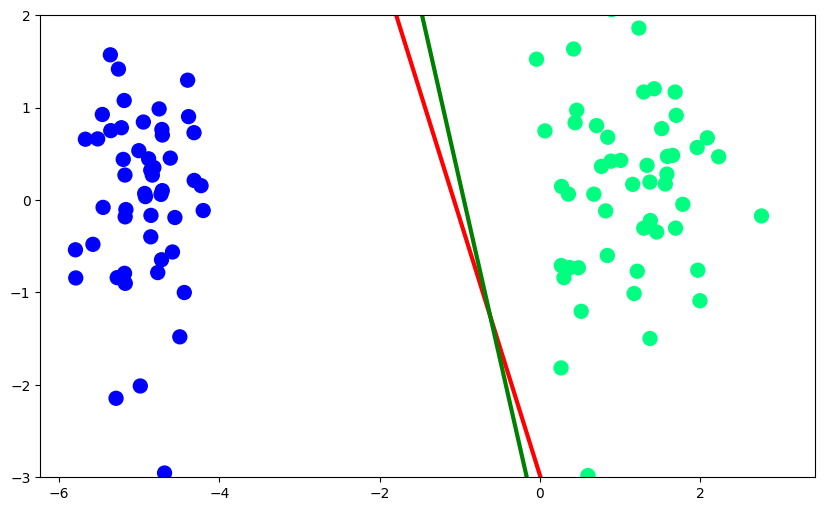

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.plot(s_x_input, s_y_input, color="green", linewidth=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)

In [31]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [50]:
print(lor.intercept_)
print(lor.coef_)
x_input_lr = np.linspace(-3, 3, 100)
y_input_lr = -((lor.coef_[0][0] / lor.coef_[0][1]) * x_input_lr) - (
    lor.intercept_ / lor.coef_[0][1]
)

[3.54861952]
[[1.77298737 0.0122258 ]]


(-3.0, 2.0)

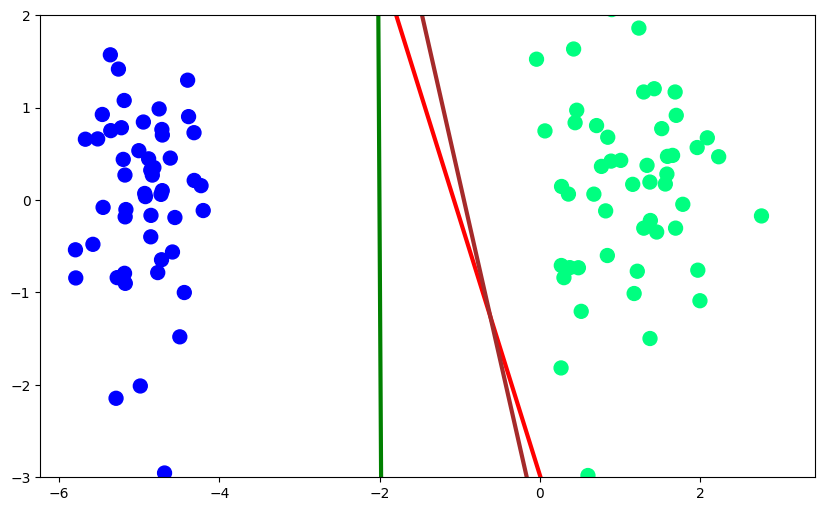

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.plot(x_input_lr, y_input_lr, color="green", linewidth=3)
plt.plot(s_x_input, s_y_input, color="brown", linewidth=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)